https://github.com/skchandrappa/dsa-cookbook.git



# Graph Implementation

In [6]:
!pip install genson

In [7]:
class edge:
  def __init__(self,start,weight,end):
    self.start=start
    self.weight=weight
    self.end=end

class node:
  def __init__(self,name,dtype):
    self.name=name
    self.dtype=dtype
    self.neighors=[]
    self.visited=False
    self.predecessor=None
    self.distance=0

  def add_edge(self,weight,end):
    self.neighors.append(edge(self,weight,end))

  def __str__(self):
    return self.name

  def printGraph(self):
    visited = []
    queue = [self]

    print(self.name)

    while queue:
      vertex = queue.pop(0)
      print(vertex.name,":",vertex.dtype)
      if vertex.name not in visited:
    #     print(vertex.name)
        visited.append(vertex.name)
        for edge in vertex.neighors:
          queue.append(edge.end)

# Schema Graph

In [8]:
import json
import genson
import networkx as nx
import matplotlib.pyplot as plt

class schemaGraph:
  def __init__(self,data):
    self.data=data


  def convert_schema(data):

      # Create a schema builder.
      # Add data to the schema builder.
      # Generate the schema.

      schema_builder = genson.SchemaBuilder(data)
      schema_builder.add_object(data )
      return schema_builder.to_schema()

  def loadSchematoGraph(self,startNode,properties):

    def loadrSchematoGraph(startNode,properties):
      for key,value in properties.items():
        if value["type"] != "object":
            new_node = node(key,value['type'])
            startNode.add_edge(0,new_node)
        else:
            new_node = node(key,value['type'])
            startNode.add_edge(0,new_node)
            loadrSchematoGraph(new_node,value["properties"])

    loadrSchematoGraph(startNode,properties)


data = {
  "name": "John Doe",
  "age": 30,
  "weight":26.3456,
  "is_student": True,
  "hobbies": ["reading", "coding", "traveling"],  ### create a line with add Button and repeat if not Json else drop down list.
  "address": {
    "street": "123 Main St",
    "city": "Anytown",
    "state": "CA",
    "zip": 12345
  },
  "favorite_color": '',
  "last_updated": "2023-12-31T23:59:59Z"
}

schema = schemaGraph(data)
schema1 = schemaGraph.convert_schema(data)
props = schema1['properties']
startNode = node("root","schema")
schema.loadSchematoGraph(startNode,props)
startNode.printGraph()


root
root : schema
name : string
age : integer
weight : number
is_student : boolean
hobbies : array
address : object
favorite_color : string
last_updated : string
street : string
city : string
state : string
zip : integer


# Structure Graph


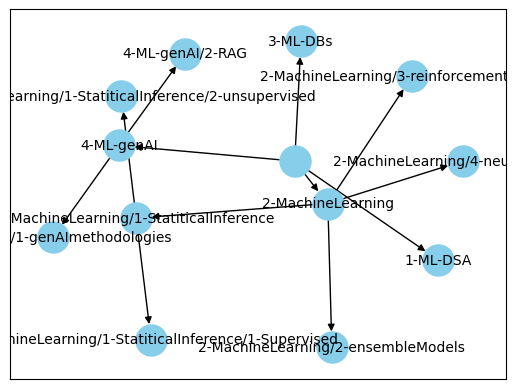

In [ ]:
import requests
import networkx as nx
import json
import os

def create_github_directory_graph(repo_owner, repo_name, token):
    """
    Creates a NetworkX graph representing the directory structure of a GitHub repository.

    Args:
        repo_owner: The owner of the GitHub repository.
        repo_name: The name of the GitHub repository.
        token: A personal access token for GitHub API authentication.

    Returns:
        A NetworkX DiGraph object representing the directory structure.
    """

    G = nx.DiGraph()
    url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/contents/"
    headers = {"Authorization": f"token {token}"}

    def fetch_contents(url):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            contents = json.loads(response.text)
            for item in contents:
                if item["type"] == "dir":
                    G.add_node(item["path"])
                    if item["path"] != "":
                        parent_dir = os.path.dirname(item["path"])
                        G.add_edge(parent_dir, item["path"])
                    fetch_contents(item["url"])

    fetch_contents(url)
    return G

# Example usage:
repo_owner = "your_username"
repo_name = "your_repository_name"
token = "your_personal_access_token"

graph = create_github_directory_graph(repo_owner, repo_name, token)

# Visualize the graph (optional)
import matplotlib.pyplot as plt
nx.draw_networkx(graph, with_labels=True, node_size=500, node_color='skyblue', font_size=10)
plt.show()

# Command Graph.

# LLM Pings and resultset.

In [15]:
from openai import OpenAI
from google.colab import userdata

system_message =  "You are a helpful assistant for a ReactJS coder"
system_message += "give answers as modules that can be used with export"
system_message += "Always be accurate. If you don't know the answer, say so."

def user_prompt_for(title,text):
    user_prompt = f"You are looking at a website titled {title}"
    user_prompt += "The contents of this website is as follows; please find any value about APY, Terms rewards and respond as as JSON with following format {'apy':'','fees':''}. ignore anything else.\n\n"
    user_prompt += text
    return user_prompt

def messages_for(content):
    return [
        {"role": "system", "content": system_message},
        {"role": "user", "content": content}
    ]

def codebits(content):
    # searpApiKey = getApiKeys()
    # api_key = searpApiKey.getApiKeys('openAIAPIKey')

    openai = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

    # user_prompt = user_prompt_for(content,contents[content])
    messages = messages_for(content)

    response = openai.chat.completions.create(
        model = "gpt-4o-mini",
        messages = messages
    )
    # responses.append(response.choices[0].message.content)
    return response



In [21]:
import json
prompt = "return a reactjs code for: "+str(schema1)
response  = codebits(prompt)
print(response.choices[0].message.content)

```javascript
import React from 'react';

// The schema representing the user data
const userSchema = {
  '$schema': {
    'name': 'John Doe',
    'age': 30,
    'weight': 26.3456,
    'is_student': true,
    'hobbies': ['reading', 'coding', 'traveling'],
    'address': {
      'street': '123 Main St',
      'city': 'Anytown',
      'state': 'CA',
      'zip': 12345
    },
    'favorite_color': '',
    'last_updated': '2023-12-31T23:59:59Z'
  },
  'type': 'object',
  'properties': {
    'name': { 'type': 'string' },
    'age': { 'type': 'integer' },
    'weight': { 'type': 'number' },
    'is_student': { 'type': 'boolean' },
    'hobbies': { 'type': 'array', 'items': { 'type': 'string' } },
    'address': {
      'type': 'object',
      'properties': {
        'street': { 'type': 'string' },
        'city': { 'type': 'string' },
        'state': { 'type': 'string' },
        'zip': { 'type': 'integer' }
      },
      'required': ['city', 'state', 'street', 'zip']
    },
    'favorite_

# UI Design Principle and standards Enhancement.

# Github Upload